<a href="https://colab.research.google.com/github/Divv1524/digitrecognition/blob/main/digitreognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



In [5]:
# Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1.4264 - accuracy: 0.5823 - val_loss: 0.7098 - val_accuracy: 0.8059
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5954 - accuracy: 0.8291 - val_loss: 0.4613 - val_accuracy: 0.8668
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.8734 - val_loss: 0.3841 - val_accuracy: 0.8911
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8903 - val_loss: 0.3429 - val_accuracy: 0.9020
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8985 - val_loss: 0.3177 - val_accuracy: 0.9099
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.9049 - val_loss: 0.3014 - val_accuracy: 0.9146
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.9103 - val_loss: 0.2850 - val_accuracy: 0.9185
Epoch 

In [7]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


313/313 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.9245
Test accuracy: 92.45%


In [8]:
# Make predictions
predictions = model.predict(X_test[:10])
predicted_labels = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 59ms/step


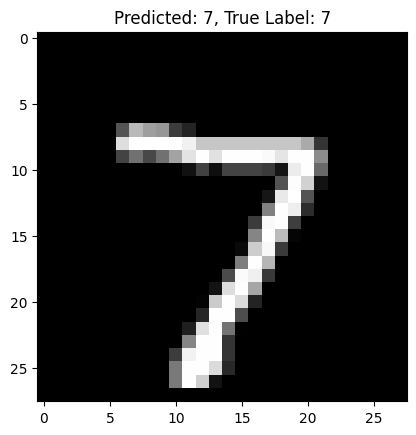

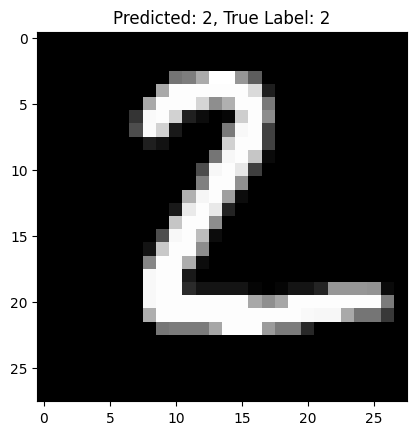

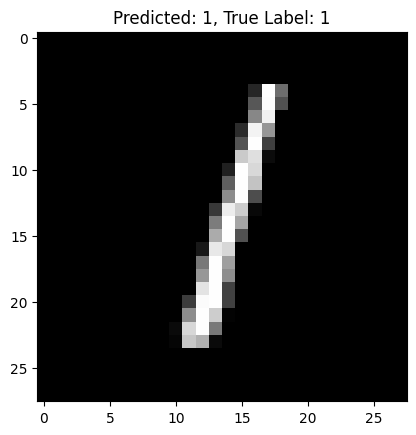

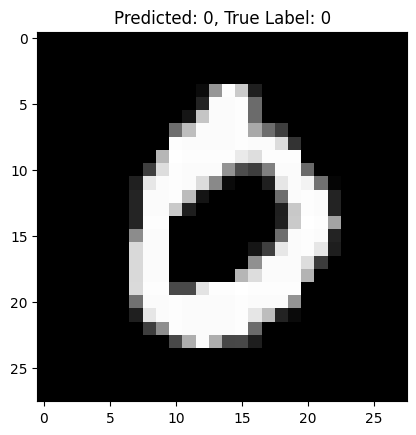

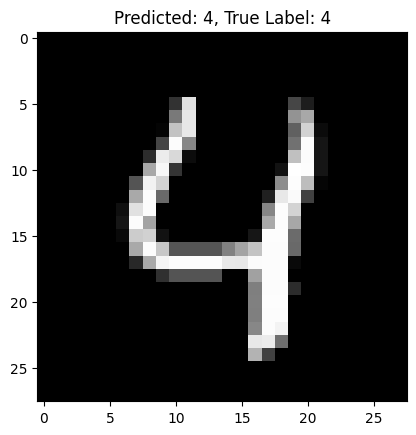

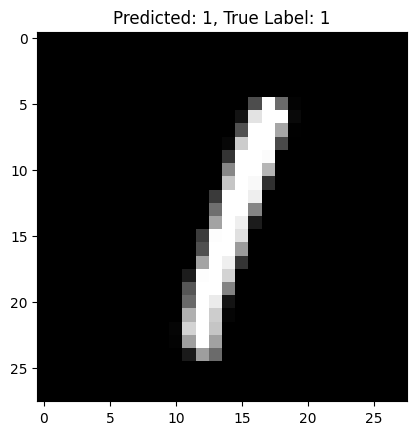

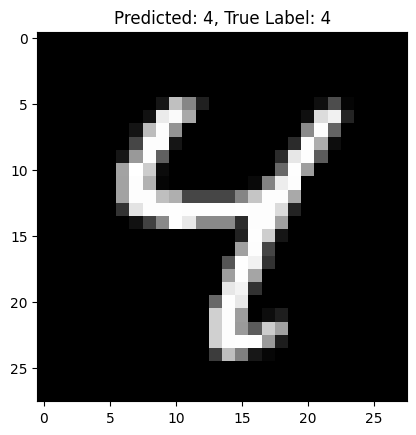

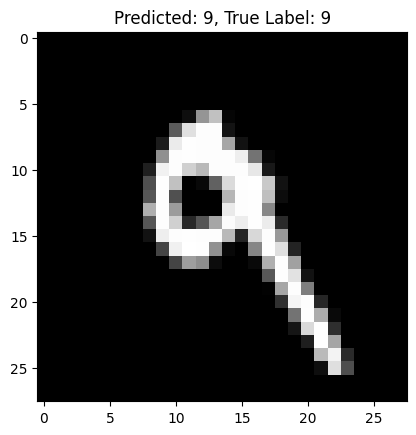

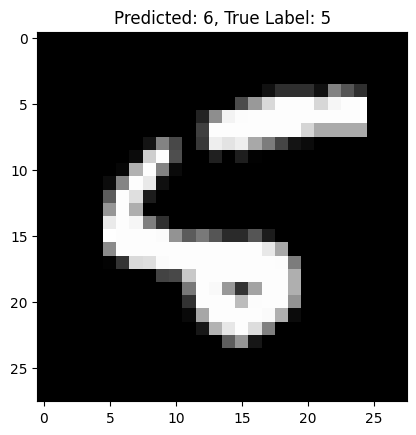

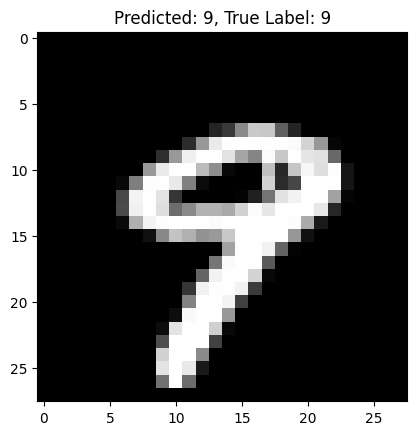

In [9]:
# Visualize the first 10 test images and their predictions
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True Label: {np.argmax(y_test[i])}")
    plt.show()
